<img src='esteban.png' width=250px >

### Profesores:

    * Francisco Alfaro, Ingeniero civil matemático.
    * Harald Heitmann, Licenciado en matemática.


software: python 3+ ; librerías: numpy/pandas/matplotlib/scikit-learn.
instalación anaconda/miniconda
            
objetivo: introducción a data-science, orientado a una competencia al final del curso.


# ¿Qué es data science?
mezcla machine learning/ estadística/ big-data

este curso trata 

## Primer Paso: adquisición de datos.
para hacer data science necesitamos datos, estos pueden venir en distintos formatos: Excel/CSV/txt/JSon y muchos otros.
Pandas esuna herramienta que provee python que permite cargar muchos tipos de archivos facilmente.

In [57]:
import pandas as pd
import sqlite3
from IPython.display import display
% matplotlib inline
df_1=pd.read_csv('data_1.csv')
#df_2=pd.read_excel('data_2.xlsx',sheetname=0)
df_3=pd.read_csv('data_3.txt',delimiter=';')
cnx = sqlite3.connect('database.sqlite')
df_4 = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) 
cnx.close()
### muy facil

In [58]:
df_1.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [59]:
df_3.head(10)

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75.0,19.9,Cherrie Tree
1,11.3,79.0,24.2,Cherry Tree
2,11.4,76.0,21.0,Cherry Tree
3,11.4,76.0,21.4,Apple Tree
4,13.7,71.0,25.7,Cherry Tree
5,13.8,64.0,24.9,Cherry Tree
6,14.0,78.0,34.5,Cherrie Tree
7,14.2,80.0,31.7,Cherry Tree
8,NaN,74.0,36.3,Apple Tree
9,16.0,72.0,38.3,Cherry Tree


In [60]:
df_4.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Manipulación de datos:
    * Agregar y borrar columnas y filas
    * Masking
    * NaN
    * GroupBy

Pandas trabaja con DataFrames, similares a los de R. la manipulación de estos es sencilla, por ejemplo, con el siguiente comando podemos agregar una columna a df_3

In [63]:
df_3['radio']=df_3.diametro/2
df_3.head()

,diametro,altura,volumen,tipo_de_arbol,radio
0,11.2,75.0,19.9,Cherrie Tree,5.60
1,11.3,79.0,24.2,Cherry Tree,5.65
2,11.4,76.0,21.0,Cherry Tree,5.70
3,11.4,76.0,21.4,Apple Tree,5.70
4,13.7,71.0,25.7,Cherry Tree,6.85


In [64]:
## eliminar columna
df_3.drop('radio',axis=1,inplace=True) 
df_3.head()

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75.0,19.9,Cherrie Tree
1,11.3,79.0,24.2,Cherry Tree
2,11.4,76.0,21.0,Cherry Tree
3,11.4,76.0,21.4,Apple Tree
4,13.7,71.0,25.7,Cherry Tree


In [65]:
### masking: permite filtrar el dataframe dependiendo por ejemplo:
df_3[df_3.volumen>df_3.volumen.mean()]


,diametro,altura,volumen,tipo_de_arbol
9,16.0,72.0,38.3,Cherry Tree
10,16.3,77.0,42.6,Cherry Tree
11,17.3,81.0,55.4,Apple Tree
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80.0,58.3,Cherry Tree
14,18.0,80.0,51.5,Cherry Tree
15,18.0,NaN,51.0,NaN


# ¿y como podemos tratar los datos faltantes (Nan)?
sencillo .fillna() o dropna()
Si queremos botar los datos faltantes, podemos usar el metodo dropna de un dataframe, pero tambien podemos rellenarlos por valores predeterminados (media, promedio moda etc)

In [66]:
df_nonan=df_3.dropna()
display(df_nonan.head())
print ('botamos %d filas' %(len(df_3)-len(df_nonan)))

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75.0,19.9,Cherrie Tree
1,11.3,79.0,24.2,Cherry Tree
2,11.4,76.0,21.0,Cherry Tree
3,11.4,76.0,21.4,Apple Tree
4,13.7,71.0,25.7,Cherry Tree


botamos 4 filas


In [67]:
df_fillna=df_3.fillna('-----')
display(df_fillna)

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,-----,74,36.3,Apple Tree
9,16,72,38.3,Cherry Tree


In [68]:
## y si queremos agrupar datos por una columna?
df_3.groupby('tipo_de_arbol').mean()

,diametro,altura,volumen
tipo_de_arbol,,,
Apple Tree,14.350000,77.000000,37.70
Cherrie Tree,12.600000,76.500000,27.20
Cherry Tree,15.518182,75.444444,37.39


### Visualizacion de datos con pandas

### Histogramas por columnas

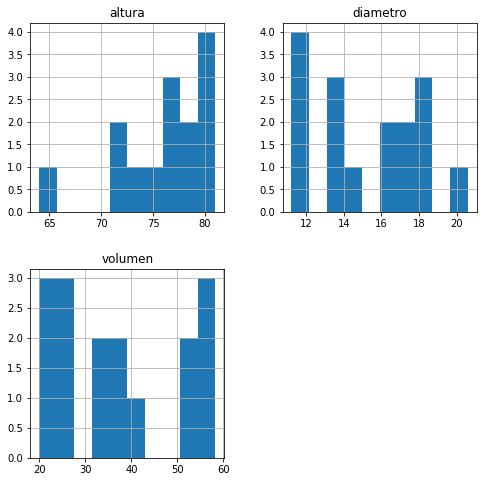

In [90]:
from matplotlib import pyplot as plt
df_3.hist(figsize=(8,8))
plt.show()

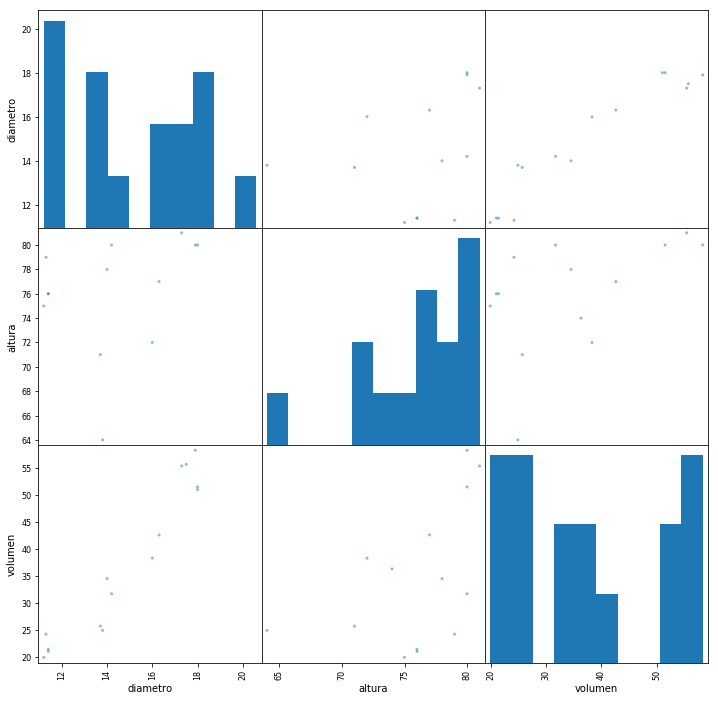

In [87]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_3,figsize=(12, 12))
plt.show()

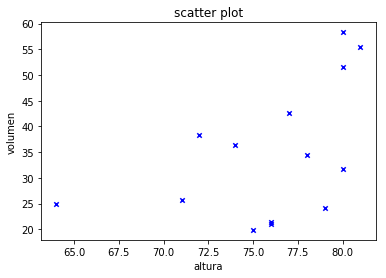

In [111]:
df_3.plot.scatter(x='altura',y='volumen',color='blue',marker='x')    
plt.title('scatter plot')
plt.show()